In [1]:
!pip install plotly

In [2]:
#standard libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
d1 = pd.read_excel("/content/Item_details.xlsx")
d2 = pd.read_excel("/content/Store_details.xlsx")
d3 = pd.read_csv("/content/sales_data.csv")
d4 = pd.read_csv("/content/wastage_data.csv")

In [4]:
d1.head()

Product_ID  Product_Description   Category   Seasonality SubCategory  \
0      100701  Almond Fresh Punnet      Fruit      Seasonal      Almond   
1      100702                 Amla  Vegetable  Non Seasonal        Amla   
2      100705            Amla pack  Vegetable  Non Seasonal        Amla   
3      100706                Apple      Fruit      Seasonal       Apple   
4      100707      Apple impo Pack      Fruit      Seasonal       Apple   

   Shelf Life in days  
0                  10  
1                   5  
2                   5  
3                   5  
4                   5

In [5]:
d2.head()

Location_ID   Store_Name  TotalArea_SqFt       City              Address
0          202     Sarjapur    72728.230053     Mumbai        Inifinti Mall
1          203     Madiwala    58667.417571       Pune  Phoneix Market City
2          204      Kemfort    55737.536255    Chennai       Express Avenue
3          205  Mahadevpura    49907.415822  Hyderabad           Orbit Mall
4          206   Bulltemple    47734.305387     Mysore           Forum Mall

In [6]:
d3.head()

Location_ID  Product_ID Transaction_Date  Sales_Value  Qty_Sold  \
0          202      100701       2017-06-16         44.1       1.0   
1          202      100701       2017-06-17         49.0       1.0   
2          202      100701       2017-06-18         93.1       2.0   
3          202      100701       2017-06-20          0.0       0.0   
4          202      100701       2017-06-26          0.0       0.0   

   Total_Transactions  
0               397.0  
1              1275.0  
2              1165.0  
3               389.0  
4               780.0

In [7]:
d4.head()

Location_ID  Product_ID Transaction_Date  Wastage_QTY  Wastage_Value
0          202      100701       2017-06-16          0.0            0.0
1          202      100701       2017-06-17          0.0            0.0
2          202      100701       2017-06-18          0.0            0.0
3          202      100701       2017-06-20         -4.0         -152.0
4          202      100701       2017-06-26         -1.0          -38.0

In [8]:
df1 = d3.merge(d4,on=["Location_ID","Product_ID","Transaction_Date"])
df2= df1.merge(d2,on=["Location_ID"])
df = df2.merge(d1,on=["Product_ID"])
df = df[df['Location_ID']==202]

In [9]:
df.drop(["Location_ID","Store_Name","TotalArea_SqFt","City","Address","Total_Transactions"],axis=1,inplace  = True)

<ipython-input-9-10d081a06612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Location_ID","Store_Name","TotalArea_SqFt","City","Address","Total_Transactions"],axis=1,inplace  = True)


In [10]:
df.head()

Product_ID Transaction_Date  Sales_Value  Qty_Sold  Wastage_QTY  \
0      100701       2017-06-16         44.1       1.0          0.0   
1      100701       2017-06-17         49.0       1.0          0.0   
2      100701       2017-06-18         93.1       2.0          0.0   
3      100701       2017-06-20          0.0       0.0         -4.0   
4      100701       2017-06-26          0.0       0.0         -1.0   

   Wastage_Value  Product_Description Category Seasonality SubCategory  \
0            0.0  Almond Fresh Punnet    Fruit    Seasonal      Almond   
1            0.0  Almond Fresh Punnet    Fruit    Seasonal      Almond   
2            0.0  Almond Fresh Punnet    Fruit    Seasonal      Almond   
3         -152.0  Almond Fresh Punnet    Fruit    Seasonal      Almond   
4          -38.0  Almond Fresh Punnet    Fruit    Seasonal      Almond   

   Shelf Life in days  
0                  10  
1                  10  
2                  10  
3                  10  
4                  10

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184512 entries, 0 to 1705941
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Product_ID           184512 non-null  int64  
 1   Transaction_Date     184512 non-null  object 
 2   Sales_Value          184512 non-null  float64
 3   Qty_Sold             184512 non-null  float64
 4   Wastage_QTY          184512 non-null  float64
 5   Wastage_Value        184512 non-null  float64
 6   Product_Description  184512 non-null  object 
 7   Category             184512 non-null  object 
 8   Seasonality          184512 non-null  object 
 9   SubCategory          184512 non-null  object 
 10  Shelf Life in days   184512 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 16.9+ MB


In [12]:
#waste value is in the object type ,it was numeric value so converting it into float64
df["Wastage_Value"] = df["Wastage_Value"].astype('float64')

In [13]:
#Transaction data is conveting into datetime type and product_ID converting into object
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])
df["Product_ID"] = df["Product_ID"].astype("object")

# Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184512 entries, 0 to 1705941
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Product_ID           184512 non-null  object        
 1   Transaction_Date     184512 non-null  datetime64[ns]
 2   Sales_Value          184512 non-null  float64       
 3   Qty_Sold             184512 non-null  float64       
 4   Wastage_QTY          184512 non-null  float64       
 5   Wastage_Value        184512 non-null  float64       
 6   Product_Description  184512 non-null  object        
 7   Category             184512 non-null  object        
 8   Seasonality          184512 non-null  object        
 9   SubCategory          184512 non-null  object        
 10  Shelf Life in days   184512 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 16.9+ MB


In [15]:
df.describe()

Sales_Value       Qty_Sold    Wastage_QTY  Wastage_Value  \
count  184512.000000  184512.000000  184512.000000  184512.000000   
mean     1326.728653      42.078381      -5.312361    -120.594099   
std      3175.694617     122.119959      36.302000     862.700273   
min         0.000000       0.000000   -3929.000000  -96097.551000   
25%        90.000000       1.626000      -4.000000    -122.000000   
50%       337.419000       7.017950       0.000000       0.000000   
75%      1176.941475      32.000000       0.000000       0.000000   
max     66894.680400    7726.112000    2858.000000   96097.551000   

       Shelf Life in days  
count       184512.000000  
mean             4.091056  
std              1.227235  
min              2.000000  
25%              3.000000  
50%              5.000000  
75%              5.000000  
max             10.000000

In [19]:
df["Product_ID"].value_counts()

101048    2922
100786    2918
100818    2742
100938    1668
100806    1461
          ... 
100821       6
100883       5
100795       4
101017       4
101137       2
Name: Product_ID, Length: 318, dtype: int64

<ipython-input-23-d5ee10330fc8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Figure size 500x500 with 0 Axes>

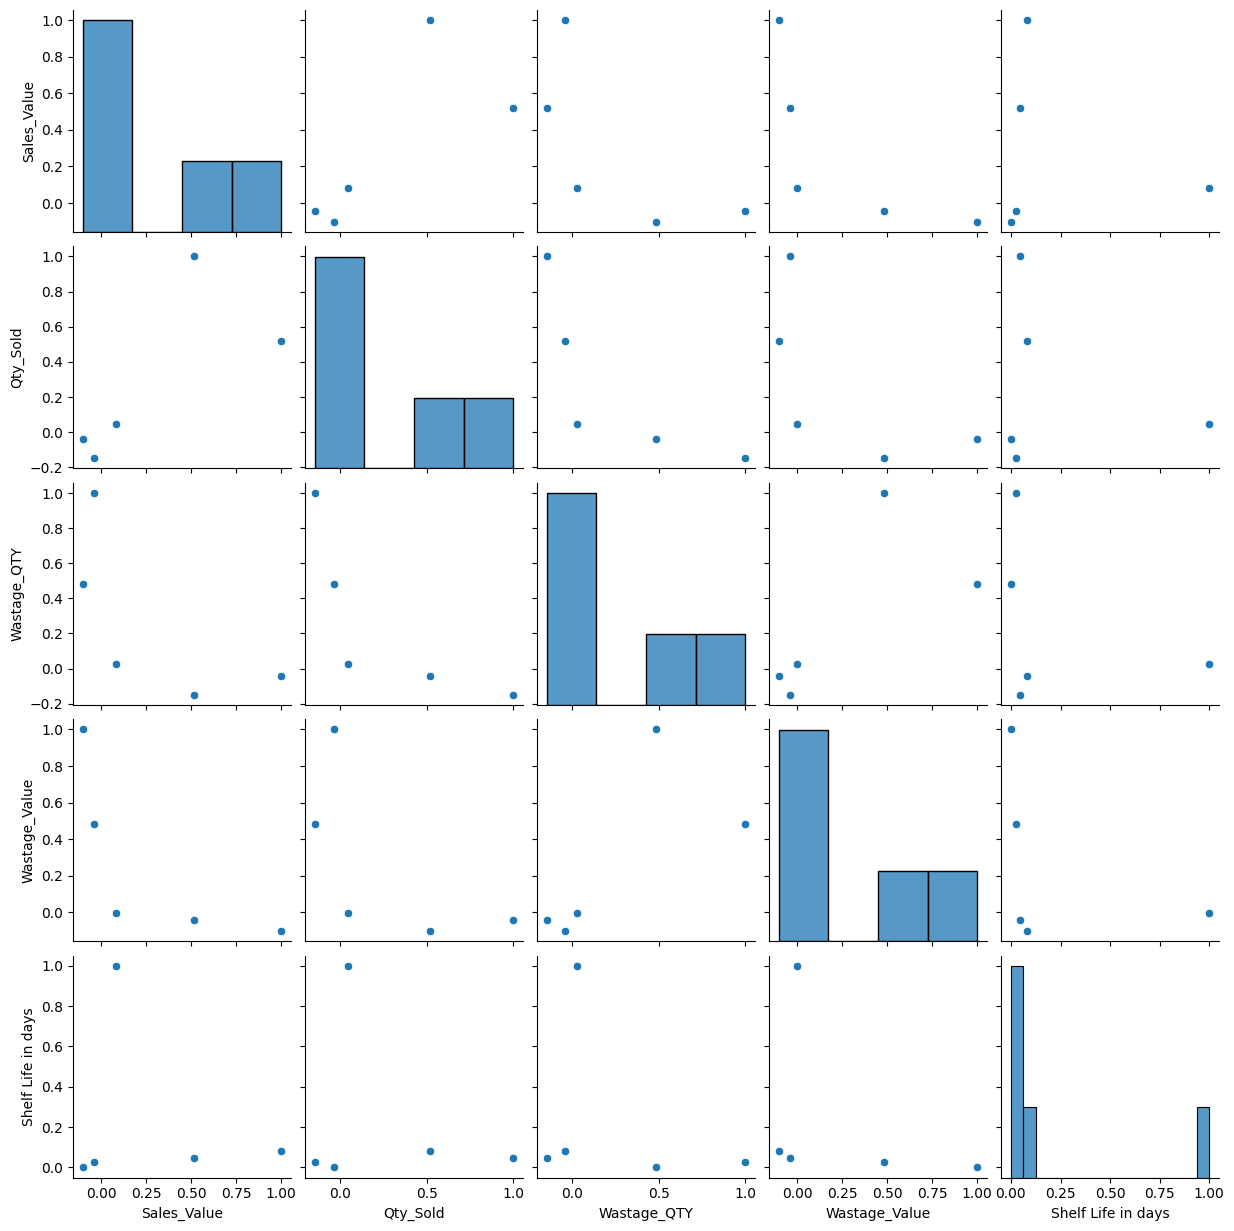

In [23]:
correlation = df.corr()
plt.figure(figsize=(5,5))
sns.pairplot(correlation)

In [31]:
from sklearn.preprocessing import StandardScaler
src = StandardScaler()
s= src.fit_transform(df["Qty_Sold"][:,np.newaxis])

<ipython-input-31-8b2e886ef151>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  s= src.fit_transform(df["Qty_Sold"][:,np.newaxis])


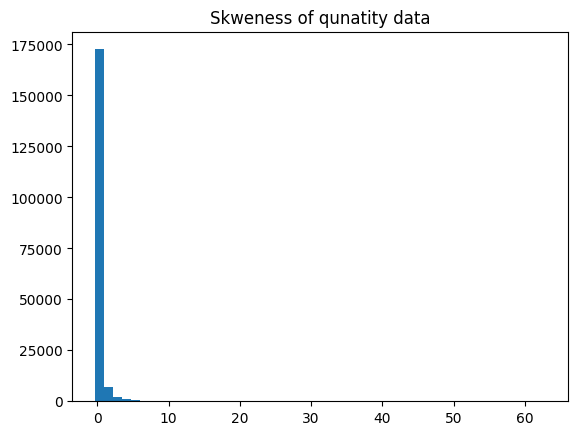

In [39]:
plt.hist(s,bins=50);
plt.title("Skweness of qunatity data");

<ipython-input-40-3636784a01df>:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(s));


Text(0.5, 1.0, 'converstion skewness  into normal distribution using log transformation')

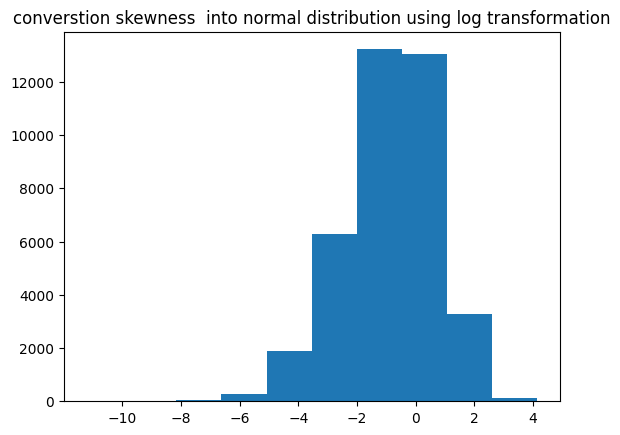

In [40]:
plt.hist(np.log(s));
plt.title("converstion skewness  into normal distribution using log transformation")

In [42]:
df.duplicated().sum()

0

In [43]:
df.isnull().sum()

Product_ID             0
Transaction_Date       0
Sales_Value            0
Qty_Sold               0
Wastage_QTY            0
Wastage_Value          0
Product_Description    0
Category               0
Seasonality            0
SubCategory            0
Shelf Life in days     0
dtype: int64